In [130]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [131]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [132]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.533703,-2.080136,1.794203,-1.041281,0.501564,0
1,0.517576,-3.651064,3.757816,-0.211232,-0.051856,0
2,0.772975,1.146355,-1.559617,-0.086797,0.491219,1
3,1.566150,0.195885,0.102487,0.224095,3.562701,1
4,0.236980,0.544732,-1.846869,-1.377991,1.735420,1


In [133]:
# Function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [134]:
# Function for feature sampling
def sample_feature(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [183]:
# Function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_feature(new_df,col_percent)

## 1. Using Sample Rows

In [136]:
# First sub Data for DT 1
df1 = sample_rows(df,0.2)
df1.shape

(20, 6)

In [137]:
# Second sub Data for DT 2
df2 = sample_rows(df,0.2)
df2.shape

(20, 6)

In [138]:
# Third sub Data for DT 3
df3 = sample_rows(df,0.2)
df3.shape

(20, 6)

In [139]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [140]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [141]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[0] <= -1.599\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'x[2] <= 1.235\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

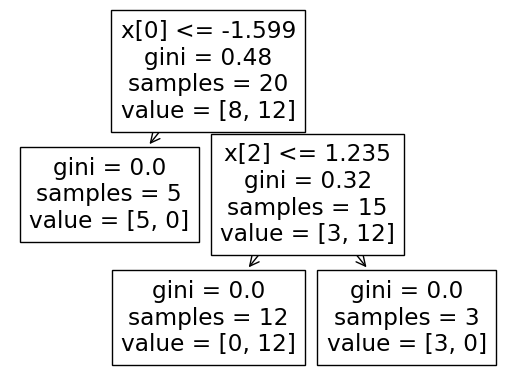

In [142]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.249\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.5, 'x[4] <= 0.073\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

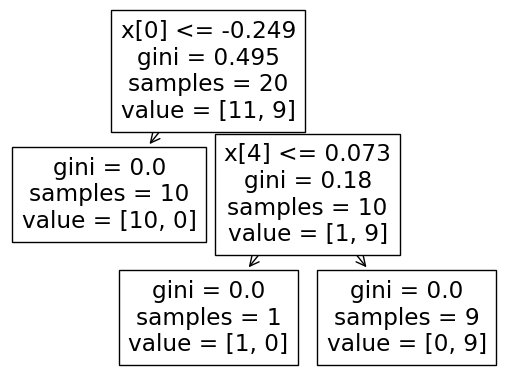

In [143]:
plot_tree(clf2)

[Text(0.7142857142857143, 0.9, 'x[2] <= 0.592\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.5714285714285714, 0.7, 'x[0] <= -0.03\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.42857142857142855, 0.5, 'x[2] <= -1.394\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2857142857142857, 0.3, 'x[1] <= -1.291\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

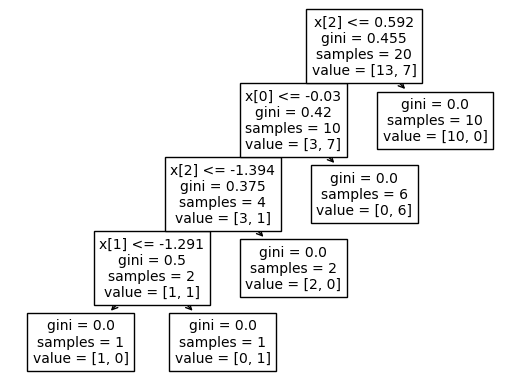

In [144]:
plot_tree(clf3)

In [145]:
clf1.predict(np.array([1.913508,2.155869,4.039801,-2.447678,-1.597503]).reshape(1,5))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [146]:
clf2.predict(np.array([1.913508,2.155869,4.039801,-2.447678,-1.597503]).reshape(1,5))


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [147]:
clf3.predict(np.array([1.913508,2.155869,4.039801,-2.447678,-1.597503]).reshape(1,5))


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [148]:
# As two of three are predicting 0 so 0 will be the output 

## 2. Using Sample Features

In [170]:
# First sub Data for DT 1
df1 = sample_feature(df,0.9)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [167]:
# First sub Data for DT 1
df2 = sample_feature(df,0.9)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [168]:
# First sub Data for DT 1
df3 = sample_feature(df,0.9)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [169]:
df3

,col1,col4,col3,col5,target
0,-0.533703,-1.041281,1.794203,0.501564,0
1,0.517576,-0.211232,3.757816,-0.051856,0
2,0.772975,-0.086797,-1.559617,0.491219,1
3,1.566150,0.224095,0.102487,3.562701,1
4,0.236980,-1.377991,-1.846869,1.735420,1
...,...,...,...,...,...
95,1.140221,2.291763,-1.613562,1.689995,1
96,0.932889,1.849717,-0.334623,1.439300,1
97,1.129401,1.745709,-0.320150,-0.263934,1
98,-1.023049,0.238097,-0.173541,-0.224020,0


In [171]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [172]:
clf4.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf5.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf6.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6166666666666667, 0.9, 'x[3] <= 0.502\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.43333333333333335, 0.7, 'x[2] <= -0.922\ngini = 0.386\nsamples = 65\nvalue = [17, 48]'),
 Text(0.26666666666666666, 0.5, 'x[3] <= -0.44\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.13333333333333333, 0.3, 'x[0] <= -0.174\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.06666666666666667, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.4, 0.3, 'x[2] <= -1.074\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.5, 'x[1] <= -1.657\ngini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(0.5333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.8, 0.7, 'x[2

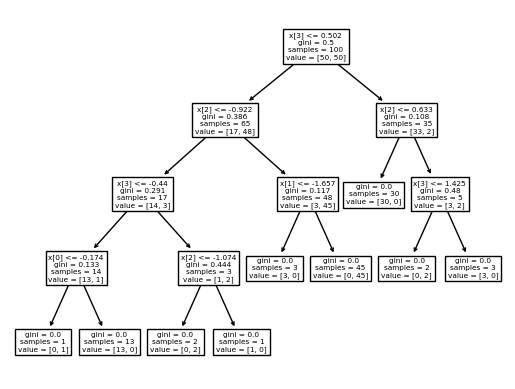

In [173]:
plot_tree(clf4)

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.584\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.7857142857142857, 'x[2] <= -0.9\ngini = 0.39\nsamples = 64\nvalue = [47, 17]'),
 Text(0.125, 0.6428571428571429, 'x[3] <= 1.348\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.6428571428571429, 'x[3] <= 0.875\ngini = 0.494\nsamples = 36\nvalue = [20, 16]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.4375, 0.5, 'x[1] <= 0.599\ngini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(0.3125, 0.35714285714285715, 'x[2] <= -0.466\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5625, 0.35714285714285715, 'x[0] <= -0.071\ngini = 0.105\nsamples = 18\nvalue = [17, 1

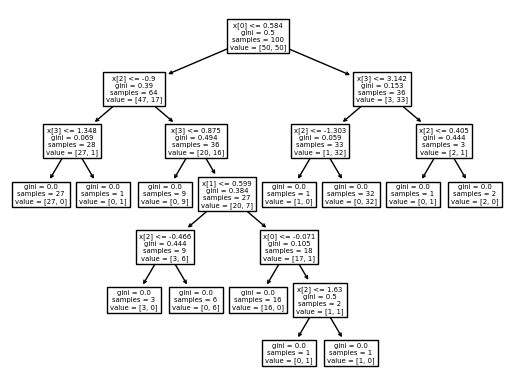

In [174]:
plot_tree(clf5)

[Text(0.6166666666666667, 0.9285714285714286, 'x[2] <= 0.502\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.43333333333333335, 0.7857142857142857, 'x[0] <= -0.922\ngini = 0.386\nsamples = 65\nvalue = [17, 48]'),
 Text(0.26666666666666666, 0.6428571428571429, 'x[2] <= -0.44\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.13333333333333333, 0.5, 'x[1] <= -0.174\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.4, 0.5, 'x[0] <= -1.074\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.6428571428571429, 'x[1] <= -2.352\ngini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(0.5333333333333333, 0.5, 'gini = 0.0\nsamp

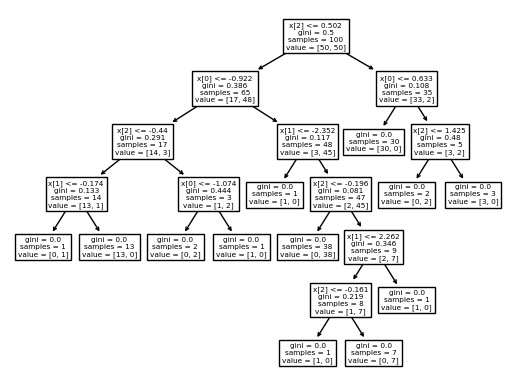

In [175]:
plot_tree(clf6)

In [176]:
clf4.predict(np.array([-0.533703,-1.041281,1.794203,0.501564]).reshape(1,4))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [177]:
clf5.predict(np.array([-0.533703,-1.041281,1.794203,0.501564]).reshape(1,4))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [178]:
clf6.predict(np.array([-0.533703,-1.041281,1.794203,0.501564]).reshape(1,4))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [199]:
# As two of three are predicting 1 so 1 will be the output 

## 3. Using Combined Sampling

In [184]:
df1 = combined_sampling(df,0.5,0.5)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [185]:
df2 = combined_sampling(df,0.5,0.5)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [186]:
df3 = combined_sampling(df,0.5,0.5)

<IPython.core.display.Javascript object>

C:\Users\godsc\AppData\Local\Temp\ipykernel_27672\907207984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [187]:
df3

,col5,col4,target
42,-0.437574,0.535047,0
2,0.491219,-0.086797,1
26,2.584659,2.950085,0
70,4.248178,1.416833,0
78,1.671479,-0.185445,0
32,2.287204,2.189120,0
63,-0.597475,0.618422,0
76,0.669175,0.191370,0
28,0.104884,0.312848,1
78,1.671479,-0.185445,0


In [188]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [190]:
clf4.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf5.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf6.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.055\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.26666666666666666, 0.7857142857142857, 'x[0] <= -0.87\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= -0.127\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.26666666666666666, 0.5, 'x[1] <= 1.605\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2, 0.35714285714285715, 'x[1] <= -0.493\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.13333333333333333, 0.21428571428571427, 'x[1] <= -1.026\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini =

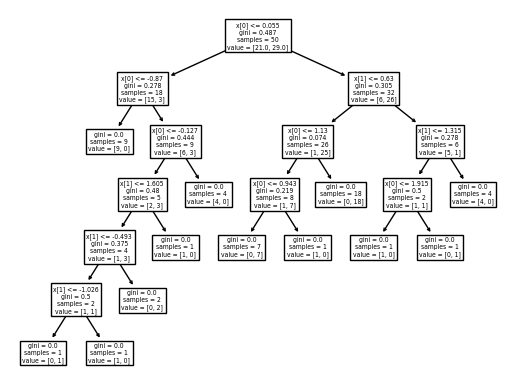

In [191]:
plot_tree(clf4)

[Text(0.6, 0.9, 'x[0] <= 0.401\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.4, 0.7, 'x[1] <= -1.299\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[1] <= -0.344\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.4, 0.3, 'x[1] <= -0.449\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]')]

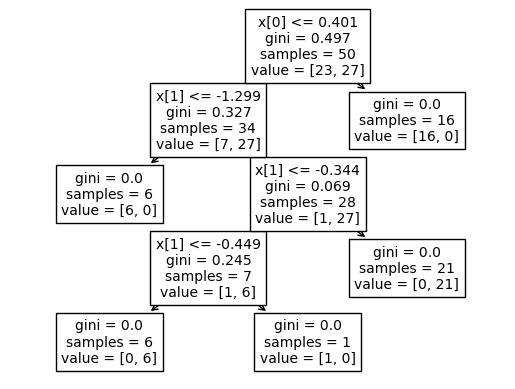

In [192]:
plot_tree(clf5)

[Text(0.47058823529411764, 0.9166666666666666, 'x[1] <= 0.424\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.23529411764705882, 0.75, 'x[0] <= 0.598\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(0.11764705882352941, 0.5833333333333334, 'x[0] <= -0.216\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.35294117647058826, 0.5833333333333334, 'x[1] <= -0.734\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4117647058823529, 0.4166666666666667, 'x[1] <= -0.201\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.35294117647058826, 0.25, 'x[1] <= -0.351\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'

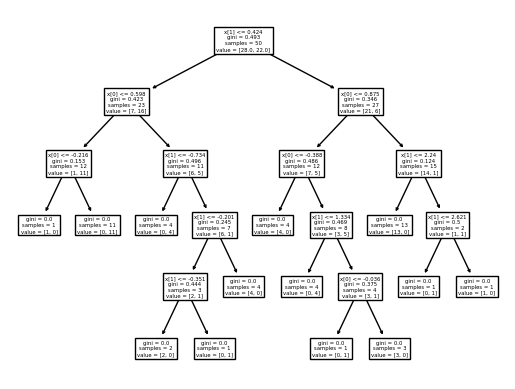

In [193]:
plot_tree(clf6)

In [194]:
clf4.predict(np.array([-0.437574,0.535047]).reshape(1,2))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [195]:
clf5.predict(np.array([-0.437574,0.535047]).reshape(1,2))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [196]:
clf6.predict(np.array([-0.437574,0.535047]).reshape(1,2))

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# As two of three are predicting 1 so 1 will be the output 